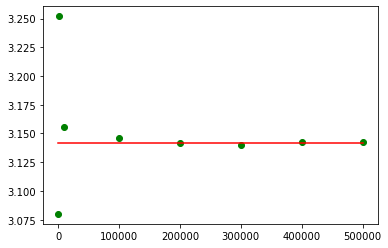

In [2]:
# モンテカルロ法とは
# 乱数を用いたシミュレーションを多数回実施し近似的な解を求める手法

# 円周率(π)を求めてみる
# 以下の面積比を用いて導出する
# プロットした点の個数(N) : 円(1/4)の領域に入った点の個数(Ni)　= 1 : π/4

import numpy as np
import matplotlib.pyplot as plt

# 試行回数のリスト
n_tot = [100,1000,10000,100000,200000,300000,400000,500000]

for i in n_tot:
    x1 = np.random.rand(i,2)
    x2 = x1**2
    x3 = np.sum(x2,axis=-1)
    x4 = x3**0.5
    x5 = np.count_nonzero(x4 < 1)    
    plt.plot(i,4*x5/i,color='green',marker='o')

x = [0,500000]
y = [np.pi,np.pi]
plt.plot(x, y, color = 'red',linestyle='solid', label='True value')
plt.show() # 試行回数が増えるにつれ、3.14に近似することがわかる

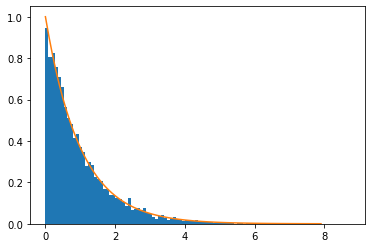

In [5]:
# 乱数生成：逆関数法
# 区間(0,1)の一様分布から生成した乱数に偏りをもたせて写像する

# 一様変数から指数分布に従う乱数を生成する
import numpy as np
import matplotlib.pyplot as plt

# 一様分布に従う乱数を10000個生成
U_data = np.random.rand(10000)

# 逆関数方法で指数分布に従うデータを生成
# 逆関数：-1/λ * log(1-u)
result_data = -np.log(1 - U_data) # λ=1の場合

# 乱数データのヒストグラムと指数分布の確率密度関数を描画
fig = plt.figure(facecolor="w")
ax = fig.add_subplot(111)
ax.hist(result_data, bins=100, density=True)
ax.plot(np.arange(0, 8, 0.1), np.exp(-1*np.arange(0, 8, 0.1)))
plt.show()

M = 2.66974399494535
サンプル数: 100000 => 37596
実際の受理率  : 0.375960
理論的な受理率: 0.374568


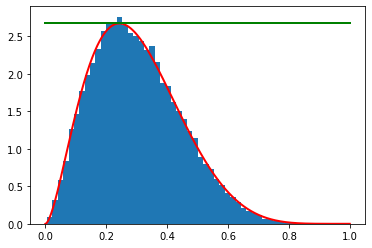

In [9]:
# 乱数生成：採択棄却法
# 

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.stats import uniform, beta

np.random.seed()

# 目標とする密度関数f
f = beta(a=2.7, b=6.3).pdf

# 提案分布(一様分布)
gv = uniform
g = gv.pdf

# 分布の上限を指定する定数Mを設定
xopt = scipy.optimize.fmin(lambda x: -f(x), 0.0, disp=False)
M = f(xopt)[0]
print("M =", M)

# 受理・棄却法
rand_count = 100000

# 提案分布gからの乱数Yを生成
Y = gv.rvs(size=rand_count)

# 一様乱数を生成
U = uniform.rvs(size=rand_count)

# Yか採択の条件を満たすサンプルXを残して残りを棄却
X = Y[U <= f(Y) / (M * g(Y))]
print("サンプル数: %d => %d" % (len(Y), len(X)))
print("実際の受理率  : %f" % (len(X) / float(len(Y))))
print("理論的な受理率: %f" % (1.0 / M))

# 目標分布を描画
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

# 提案分布(一様分布)を描画
y = M * uniform.pdf(x)
plt.plot(x, y, 'g-', lw=2)

# 採択した乱数の分布を描画
plt.hist(X, bins=50, density=True)

plt.show()

In [10]:
# モンテカルロ積分とは
# 乱数を用いて積分を数値計算すること

# 単純モンテカルロ法による円周率の計算
# *先頭の計算と同じ

import numpy as np
from random import random

def f(x):
    return 1.0/(1.0+x**2)

# 試行回数のリスト
calc_count_list = [10, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7]

for N in  calc_count_list:
    count = 0.0
    for i in range(N):
        x = random()  # [0,1]までの一様乱数をxに格納
        y = random()  # [0,1]までの一様乱数をyに格納
        if y < f (x):   #もし円の中に入ったらそれをカウントする
            count +=1.0
    area = 4*count/N # 積分結果

    print(N, ", ", area, ", ", abs((np.pi-area)/np.pi))

10 ,  3.2 ,  0.018591635788130244
100 ,  3.36 ,  0.06952121757753665
1000 ,  3.064 ,  0.024698508732865325
10000 ,  3.162 ,  0.0064958601131461175
100000 ,  3.1408 ,  0.00025230947395020833
1000000 ,  3.1424 ,  0.0002569863439438007
10000000 ,  3.14181 ,  6.918351109540606e-05


In [12]:
# ジャックナイフ法とは
# 無作為標本から得られた母数の推定量が不偏でないとき，標本を分割して、
# 幾つかの観測値を抜き取っては反復計算することで推定量のバイアスを減少させる方法のこと
# この方法によって得られた推定量をジャックナイフ推定量という．

import numpy as np
import sympy

def jackknife_estimator(r):
    divs = np.array(sympy.divisors(n))
    idx = np.abs(divs-np.sqrt(len(r))).argmin()
    bin_size = divs[idx]
    r2 = r ** 2
    r4 = r ** 4
    u_all = np.average(r4)/np.average(r2)**2
    r2 = [np.average(r2[i:i+bin_size]) for i in range(0, len(r), bin_size)]
    r4 = [np.average(r4[i:i+bin_size]) for i in range(0, len(r), bin_size)]
    u_jn = []
    m = len(r) // bin_size
    for i in range(m):
        r2_i = np.average(np.delete(r2,i))
        r4_i = np.average(np.delete(r4,i))
        u_jn.append(r4_i/r2_i**2)
    return m*u_all - (m-1)*np.average(u_jn)

samples = np.array([16,32,64,128,256])
n_trials = 128**2
for n in samples:
    u = [jackknife_estimator(np.random.randn(n)) for _ in range(n_trials)]
    print(f"{n} {np.average(u)}")

16 2.9425288372830587
32 2.9910898674010964
64 2.999912985861819
128 2.998972833040984
256 2.996096592354178


相関行列：[[1.         0.38754773]
 [0.38754773 1.        ]]


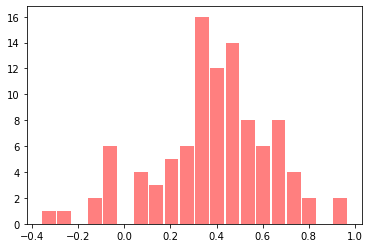

In [20]:
# ブートストラップ法とは
# 標本集団から標本集団と同じ数だけランダムに値を再抽出し、
# 新しいデータセットを取得し統計値を計算することで母集団の性質を推定するための方法

import numpy as np
import matplotlib.pyplot as plt

#英語の点数
scoE = np.array([60, 89, 65, 60, 73, 52, 70, 65, 65, 70])
#数学の点数
scoM = np.array([88, 82, 60, 65, 85, 56, 57, 75, 42, 90])

scoTotal = np.array([scoE, scoM])
print("相関行列：{}".format(np.corrcoef(scoTotal)))

# 相関係数リスト
r_list = []

# 点数リスト
scoE_data = []
scoM_data = []

for i in range(0,100):
    for j in range(0,10):
        #データから10個のデータをランダムに取り出し標本を作成
        var = np.random.randint(0,10)
        scoE_data.append(scoE[var])
        scoM_data.append(scoM[var])
        
    #作られた標本を元に相関係数を導出
    r = np.corrcoef(scoE_data, scoM_data)
        
    #相関係数を相関係数リストに代入
    r_list.append(r[0][1])

    #点数リストを初期化
    scoE_data.clear()
    scoM_data.clear()

plt.hist(r_list, bins=20, rwidth=0.9, color="red", alpha=0.5)
plt.show() # 導出した相関係数0.38(理論値)を中心とした正規分布に近似する